# IT Carlow - BSc. 
# License plate recognition
 ##### Data Science and Artificial Intelligence 
 ##### Student Name: Zhe Cui
 ##### Student Number: C00266169
 ##### Lecturer: Greg Doyle


# License plate character recognition
Histogram of Oriented Gradients (HOG) feature has good anti-interference ability to the change of image light intensity, and has strong robustness to the description of the target. Support vector machine (SVM) algorithm has the advantages of simple system structure, global optimization, short training time and so on. Therefore, the method based on the HOG feature and SVM is used to recognize characters.
### Histogram of Oriented Gradients (HOG) feature extraction
The main idea of the HOG feature is to use gradient or edge direction distribution to fully display the contour features of local targets in the image to be detected. HOG extracts the gradient of each pixel point from the cell unit in the local area of the image, so there is no strict limit on clarity, which reduces the requirements for video shooting tools.
The realization process of the HOG feature extraction algorithm is mainly divided into the following four steps:
<p>(1) Standardization of color space
First, the entire image is normalized with Gamma, which represents the compression factor, usually 0.5. This compression process can effectively reduce the sensitivity of the algorithm to illumination and improve the stability of the algorithm to illumination changes. The Gamma compression formula is:
    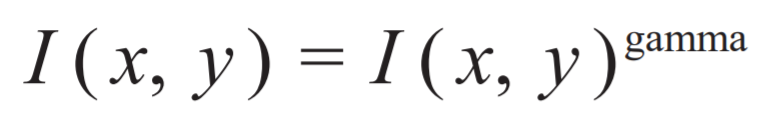
  (2) Calculate image gradient information
After the gradient values of the horizontal and vertical coordinates of the image are respectively calculated, the gradient values of each pixel are also obtained successively. The derivation operation not only gives information about the shape and parts of the texture, but also again reduces the interference caused by the light. The gradient is defined by the operator in the horizontal direction [-1, 0, 1] and the vertical direction 〖[-1,0,1]〗^T as:
    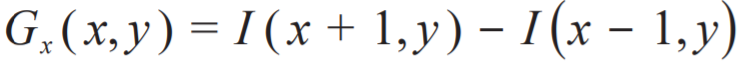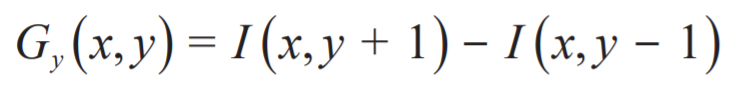
  In the formula, G_x(x, y), G_y(x, y) and I(x, y) respectively represent the horizontal gradient value, vertical gradient value and pixel gray value at the pixel point (x, y) in the input image.
The gradient amplitude and gradient direction at this pixel are respectively:
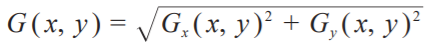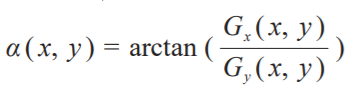
(3) Histogram of cell gradient direction
The image is divided into multiple cell units of the same size, which are composed of smaller unit pixels. Gradient information of pixels within a cell is collected using a histogram of 9 bins, as shown in Figure 15, each direction block is 20°. In the histogram, all pixel points in the cell are multiplied by the gradient amplitude to project the gradient direction. Then sum their projections, getting a cell gradient direction histogram.
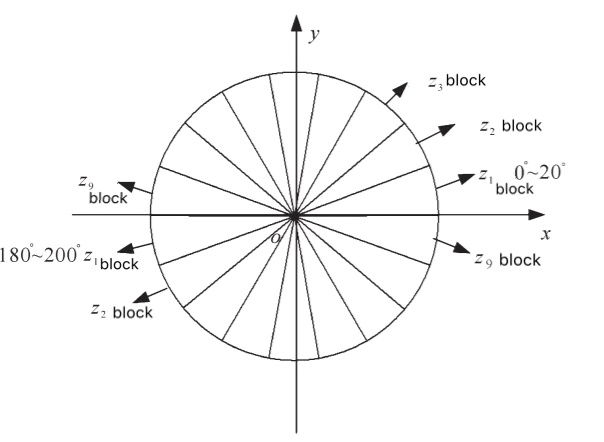!
(4) Normalized gradient histogram in blocks
Block is a block composed of several cells, and there can be overlap between different blocks. The HOG feature of the local area of the image is composed of all the blocks it contains. It is necessary to carry out intra-block normalization, mainly in order to avoid large gradient value difference caused by local exposure and other factors. The normalization process is shown in Formula below. V represents the unnormalized feature vector of a block. F represents the normalized result:
 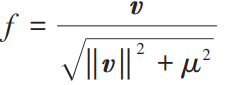


### Support vector machine (SVM) classification
The core idea of SVM is to find the separation hyperplane that meets two conditions at the same time. One is that it can accurately divide the training set, the other is that the greatest separation between the classes—it comes no closer to either, such a separation hyperplane is unique.
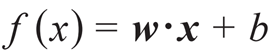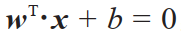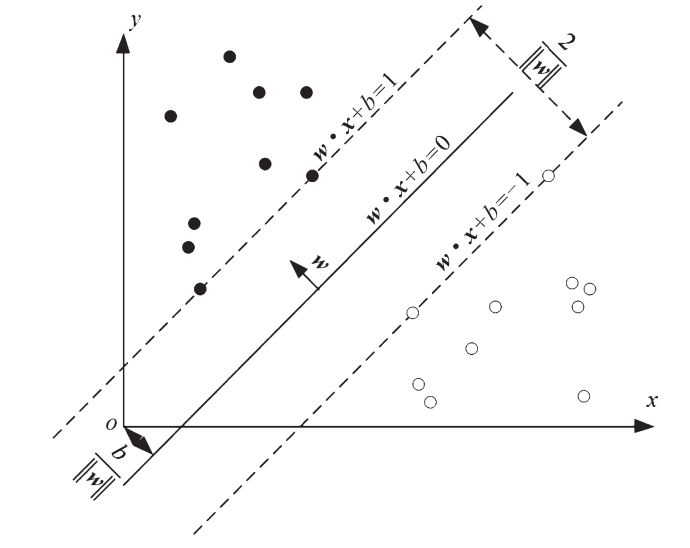
SVM classifier is a binary classifier, so this application uses the one-against-the-others algorithm combined with multiple binary classifiers to convert the multi-class identification problem into a binary identification problem, and each classifier distinguishes only one character from the others.
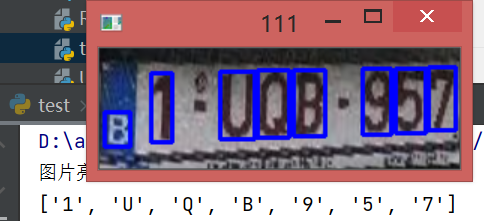

In [2]:
###Hog_svm.py

In [ ]:

import glob
import platform
import time
from PIL import Image
from skimage.feature import hog
import numpy as np
import os
import joblib
from sklearn.svm import LinearSVC
import shutil
import sys

# The first is the category, and the second is the corrsepond name of the category.
label_map = {0: '0',
             1: '1',
             2: '2',
             3: '3',
             4: '4',
             5: '5',
             6: '6',
             7: '7',
             8: '8',
             9: '9',
             'A': '10',
             'B': '11',
             'C': '12',
             'D': '13',
             'E': '14',
             'F': '15',
             'G': '16',
             'H': '17',
             'J': '18',
             'K': '19',
             'L': '20',
             'M': '21',
             'N': '22',
             'P': '23',
             'Q': '24',
             'R': '25',
             'S': '26',
             'T': '27',
             'U': '28',
             'V': '29',
             'W': '30',
             'X': '31',
             'Y': '32',
             'Z': '33',
             }
# Path of the training set image
train_image_path = 'image'
# The path of the test set image
test_image_path = 'image128'

# The path of the training set label
train_label_path = './CNN letter Dataset'
# The path of the test set label
test_label_path = './CNN letter Dataset'

image_height = 100
image_width = 75

train_feat_path = 'train/'
test_feat_path = 'test/'
model_path = 'model/'


# Get the list of images
def get_image_list(filePath, nameList):
    print('read image from ',filePath)
    img_list = []
    for name in nameList:
        temp = Image.open(name)
        img_list.append(temp.copy())
        temp.close()
    return img_list


# Extract features and save them
def get_feat(image_list, name_list, label_list, savePath):
    i = 0
    for image in image_list:
        try:
            # Change 3 to -1 for grayscale images
            image = np.reshape(image, (image_height, image_width, -1))
        except:
            print('An exception was sent. The size of the image does not meet the requirement：',name_list[i])
            continue
        gray = image / 255.0
        
        fd = hog(gray, orientations=9,block_norm='L1', pixels_per_cell=[8, 8], cells_per_block=[8, 8], visualize=False,
                 transform_sqrt=True)
        fd = np.concatenate((fd, [label_list[i]]))
        fd_name = name_list[i] + '.feat'
        fd_path = os.path.join(savePath, os.path.basename(fd_name))
        joblib.dump(fd, fd_path transform to grayscale)
        i += 1
    print("Test features are extracted and saved.")


# transform to grayscale
def rgb2gray(im):
    gray = im[:, :, 0] * 0.2989 + im[:, :, 1] * 0.5870 + im[:, :, 2] * 0.1140
    return gray


# Get the image name and corresponding category
def get_name_label(file_path):
    label_list = []
    name_list = []
    for root, dirs, files in os.walk(file_path):
        for f in files:
            # print(os.path.join(root, f),'\t',root[-1])
            label_list.append(root[-1])
            name_list.append(os.path.join(root, f))

    return name_list, label_list


# Feature extraction
def extra_feat():
    train_name, train_label = get_name_label(train_label_path)
    test_name, test_label = get_name_label(test_label_path)

    train_image = get_image_list(train_image_path, train_name)
    test_image = get_image_list(test_image_path, test_name)
    get_feat(train_image, train_name, train_label, train_feat_path)
    get_feat(test_image, test_name, test_label, test_feat_path)


# Create a folder to hold the features
def mkdir():
    if not os.path.exists(train_feat_path):
        os.mkdir(train_feat_path)
    if not os.path.exists(test_feat_path):
        os.mkdir(test_feat_path)


# Training and testing
def train_and_test():
    t0 = time.time()
    features = []
    labels = []
    correct_number = 0
    total = 0
    for feat_path in glob.glob(os.path.join(train_feat_path, '*.feat')):
        data = joblib.load(feat_path)
        features.append(data[:-1])
        labels.append(data[-1])
    print("Training a Linear LinearSVM Classifier.")
    clf = LinearSVC()
    print(features[0])
    print(labels[0])
    clf.fit(features, labels)
    # The following code is to save the model
    if not os.path.exists(model_path):
        os.makedirs(model_path)
    joblib.dump(clf, model_path + 'model')
    
    # clf = joblib.load(model_path+'model')
    print("The trained models are stored in the model folder")
    # exit()
    result_list = []
    for feat_path in glob.glob(os.path.join(test_feat_path, '*.feat')):
        total += 1
        if platform.system() == 'Windows':
            symbol = '\\'
        else:
            symbol = '/'
        image_name = feat_path.split(symbol)[1].split('.feat')[0]
        data_test = joblib.load(feat_path)
        data_test_feat = data_test[:-1].reshape((1, -1)).astype(np.float64)
        result = clf.predict(data_test_feat)
        result_list.append(image_name  + label_map[str(result[0])] + '\n')
        if int(result[0]) == int(data_test[-1]):
            correct_number += 1
    write_to_txt(result_list)
    rate = float(correct_number) / total
    t1 = time.time()
    print('Accuracy ： %f' % rate)
    print('Time spent : %f' % (t1 - t0))


def write_to_txt(list):
    with open('result.txt', 'w') as f:
        f.writelines(list)
    print('The recognition results of each image are stored in result.txt')



if __name__ == '__main__':

    mkdir()  

    if sys.version_info < (3,):
        need_extra_feat = input('Whether features need to be recaptured？y/n\n')
    else:
        need_extra_feat = input('Whether features need to be recaptured？y/n\n')

    if need_extra_feat == 'y':
        shutil.rmtree(train_feat_path)
        shutil.rmtree(test_feat_path)
        mkdir()
        extra_feat()  # Get the feature and save it in the folder

    train_and_test()  # Train and predict






In [ ]:
###test.py

In [1]:
from PIL import Image
from skimage.feature import hog
import numpy as np
import os
import joblib

# Extract features and save them
def get_feat(image_list):
    fd_list = []
    for image in image_list:
        image = np.asarray(image)
        gray = image / 255.0
    
        fd = hog(gray, orientations=12,block_norm='L1', pixels_per_cell=[8, 8], cells_per_block=[8, 8], visualize=False,
                 transform_sqrt=True)
        print(fd)
        fd_list.append(fd)
    return fd_list


# Training and testing
def test_num(fd_list):
    # clf = LinearSVC()
    
    # joblib.dump(clf, model_path + 'model')
    
    clf = joblib.load('./model/'+'model')
    # print("The trained models are stored in the model folder")
    # exit()
    result_list = []
    for feats in fd_list:
        data_test_feat = feats.reshape((1, -1)).astype(np.float64)
        result = clf.predict(data_test_feat)
        print(result[0])
imgs_list = []
imgs = Image.open('aug8155_14.jpg')

# imgs = np.asarray(imgs)
imgs = imgs.resize((75,100))
# imgs = np.asarray(imgs)
# imgs.show()
# print(imgs.shape)
imgs_list.append(imgs)
# print(imgs.shape)
fd_list = get_feat(imgs_list)
# print(fd_list)
test_num(fd_list)


[1.79870512e-04 1.99816643e-05 0.00000000e+00 ... 1.99939084e-04
 1.36460061e-04 9.85328439e-05]
5
